# DDO4MLA Assignment 1

## Introduction

In this assignment, two gradient-based optimization algorithms are to be implemented, namely, Adaptive Gradient (AdaGrad) and Root Mean Squared Propagation (RMSProp). Perform the assignment by writing your code below the **ToDo** comments. Each such comment provides a brief description of what your code should do and the amount of points you will get for the correctly written code.

## Task 1

In this task the termination condition in the method **run(key='default')** of the class **Optimizer** from the **Practice 7** is to be improved. Previously this method computed 2-norm only for **last_deltas[key][0]**, i.e. the first delta of the parameter **key**. We want this method to compute the 2-norm of a vector containing all deltas of all parameters.

For example, suppose we have two matrices $W_1=\begin{bmatrix}w_{11}^1 & w_{12}^1\\w_{21}^1 & w_{22}^1\end{bmatrix}$, $W_2=\begin{bmatrix}w_{11}^2 & w_{12}^2\\w_{21}^2 & w_{22}^2\end{bmatrix}$ associated with the key **'W'**, and two vectors $b_1=\begin{bmatrix}b_{1}^1\\b_{2}^1\end{bmatrix}$, $b_2=\begin{bmatrix}b_{1}^2\\b_{2}^2\end{bmatrix}$ associated with the key **'b'**. Then after a certain number of iterations the dictionary **last_deltas** will contain two lists **[W1, W2]** and **[b1, b2]** of deltas corresponding to the keys **'W'** and **'b'** respectively:

*last_deltas = {*

  *'W': [W1, W2],*
  
  *'b': [b1, b2]*

*}*

In this case the method **run()** should compute 2-norm of the following vector:

$$\begin{bmatrix}w_{11}^1 & w_{21}^1 & w_{12}^1 & w_{22}^1 & w_{11}^2 & w_{21}^2 & w_{12}^2 & w_{22}^2 & b_1^1 & b_2^1 & b_1^2 & b_2^2\end{bmatrix}^T.$$

**Task:** write your code below the **ToDo** comment in the function **deltas_norm(deltas)** computing 2-norm of a vector containing all deltas of all parameters.

In [1]:
import numpy as np
import numpy.linalg as la

def deltas_norm(deltas):
  """
  Computes 2-norm of a vector containing all deltas of all parameters.
  This function is called in Optimizer.run()
  Arguments:
      deltas: a dictionary containing all deltas of all parameters
  Returns:
      2-norm of a vector containing all deltas of all parameters
  """
  # ToDo: Compute the 2-norm of all deltas of all parameters (2 points)
  deltas_vector = np.concatenate([np.array(d).flatten() for d in deltas.values()])
  deltas_norm = la.norm(deltas_vector, 2)

  # Return deltas 2-norm
  return deltas_norm

class Optimizer:
  """
  Optimizer
  """

  def __init__(self, alpha, max_iter, eps, record):
    """
    Initializes an instance of the optimizer
    Arguments:
        alpha: a step size
        max_iter: a maximum number of iterations
        eps: a tolerance value
        record: a flag for recording optimization history
    """
    self.alpha = alpha
    self.max_iter = max_iter
    self.eps = eps
    self.record = record
    self.iter = None
    self.last_deltas = {}
    self.history = {}

  def _deltas(self, grads, key):
    """
    Computes the deltas based on the gradients
    Arguments:
        values: a list containing the current values of the parameter
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the updated values of the parameter
    """
    pass

  def update(self, values, grads, key='default'):
    """
    Updates the parameters
    Arguments:
        values: a list containing the current values of the parameter
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the updated values of the parameter
    """
    # Wrap the values and deltas if necessary
    if type(values) is not list:
      values = [values]
    if type(grads) is not list:
      grads = [grads]

    # Compute the deltas
    deltas = self._deltas(grads, key)

    # Compute the updated values
    updated_values = [value + delta for value, delta in zip(values, deltas)]

    # Store the updated values if necessary
    if self.record:
      if key not in self.history:
        self.history[key] = [values]
      self.history[key].append(updated_values)

    # Unwrap the updated values if necessary
    if len(updated_values) < 2:
      updated_values = updated_values[0]

    # Return the updated values
    return updated_values

  def run(self):
    """
    Updates the iteration counter and checks the termination criteria
    Returns:
        False if the optimization should be terminated, and True otherwise
    """
    # Initialize the iteration counter
    if self.iter is None:
      self.iter = 0
      return True

    # Increment the iteration counter
    self.iter = self.iter + 1

    # Check the iteration counter
    if self.iter > self.max_iter - 1:
      return False

    # Check the deltas norm
    if deltas_norm(self.last_deltas) < self.eps:
      return False

    return True

  def get_iter(self):
    """
    Returns the iteration counter
    Returns:
        The iteration counter
    """
    return self.iter

  def get_history(self, key='default'):
    """
    Returns the optimization history
    Arguments:
        key: a key identifying the type of the parameter
    Returns:
        The optimization history for the parameter with a specified key
    """
    # Retrieve the history
    history = [np.array([h[i] for h in self.history[key]]) for i in range(0, len(self.history[key][0]))]

    # Unwrap the history if necessary
    if len(history) < 2:
      history = history[0]

    # Return the history
    return history

Test the function **deltas_norm(deltas)** in the cell below. Execution of the cell below should yield a result of $18.083$.

In [2]:
# Create a dictionary containing 2 deltas for 'W' and 2 deltas for 'b'
deltas = {
    'W': [
          np.array([[4, 2],
                    [5, 7]]),
          np.array([[7, 9],
                    [3, 4]])
    ],
    'b': [
          np.array([3, 8]),
          np.array([2, 1])
    ]
}

# Compute and print the 2-norm of the deltas
print(np.around(deltas_norm(deltas), 3))

18.083


## Task 2

AdaGrad as opposed to ordinary gradient descent adapts the learning rate (step length) $\alpha$ for each parameter individually as the learning (optimization) progresses. Suppose we have a function $f(x):\mathbb{R}^m\rightarrow\mathbb{R}$ that we wish to minimize and $x\in\mathbb{R}^m$. When using AdaGrad each element $x_j$ of the vector $x$ receives its own adaptive learning rate based on the initial learning rate $\alpha$. Introducing different learning rates for different parameters helps to address sparse features: the frequency of their occurrence is lower than the one of dense features. Therefore, sparse parameters require higher learning rates [[1](#references)]. The update procedure of $x_j$ for AdaGrad is:

$$\nu_{curr,j}=\nu_{prev,j}+\bigg(\frac{\partial f}{\partial x_j}(x_{prev,j})\bigg)^2,$$

$$\Delta x_{curr,j}=-\frac{\alpha}{\sqrt{\lambda+\nu_{curr,j}}}\frac{\partial f}{\partial x_j}(x_{prev,j}),$$

$$x_{curr,j}=x_{prev,j}-\Delta x_{curr,j},$$

where $\nu_{curr,j}$ is the current sum of partial derivatives of $f(x)$ w.r.t. $x_j$, $\nu_{prev,j}$ is the previous sum of squared partial derivatives of $f(x)$ w.r.t. $x_j$, $x_{prev,j}$ is the previous value of $x_j$, $\Delta x_{curr,j}$ is the current delta of $x_j$, $\alpha$ is the initial learning rate, $\lambda$ is a small positive constant (usually $10^{-8}$) to avoid division by zero, and $x_{curr,j}$ is the current value of $x_j$.

The learning rate for each parameter is inversely proportional to the sum of its squared partial derivatives, which results in a constant decrease in the learning rate. Thus, learning rates associated with dense features will decrease faster than the ones associated with sparse features.

**Task:** write your code below the **ToDo** comments in the method **_deltas(grads, key)** according to AdaGrad update procedure.

In [3]:
class AdaGradOptimizer(Optimizer):
  """
  AdaGrad optimizer
  """

  def __init__(self, alpha, Lambda=1e-8, max_iter=5000, eps=1e-3, record=False):
    """
    Initializes an instance of the gradient descent optimizer with momentum
    Arguments:
        alpha: a learning rate
        Lambda: a small positive constant
        max_iter: a maximum number of iterations
        eps: a tolerance value
        record: a flag for recording optimization history
    """
    self.Lambda = Lambda
    self.nu = {}
    super().__init__(alpha, max_iter, eps, record)

  def _deltas(self, grads, key):
    """
    Computes the deltas based on the gradients
    Arguments:
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the deltas of the parameter
    """
    # Initialize the sums of squared partial derivatives
    if key not in self.nu:
      self.nu[key] = [np.zeros(grad.shape) for grad in grads]

    # ToDo: Update the sums of squared partial derivatives (1 point)
    self.nu[key] = [nu_prev + np.square(grad) for nu_prev, grad in zip(self.nu[key], grads)]

    # ToDo: Compute the deltas (1 point)
    deltas = [-self.alpha * grad / np.sqrt(self.Lambda +nu) for grad, nu in zip(grads, self.nu[key])]

    # Store the updated deltas
    self.last_deltas[key] = deltas

    # Return the computed deltas
    return deltas

Test the AdaGrad optimizer in the cell below. Execution of the cell below should yield:

W1, W2:

[[3.498 1.498]

 [4.498 6.498]]

[[6.498 8.498]

 [2.498 3.498]

 [0.498 1.498]]

b1, b2:

[2.498 7.498]

[1.498 0.498 2.498]

In [4]:
# Create matrices containing values of the parameters W1 and W2
W1 = np.array([[4, 2],
               [5, 7]])
W2 = np.array([[7, 9],
               [3, 4],
               [1, 2]])

# Create matrices containing gradients w.r.t. the parameters W1 and W2
gradW1 = np.array([[1, 2],
                   [2, 1]])
gradW2 = np.array([[3, 3],
                   [2, 2],
                   [1, 1]])

# Create vectors containing values of the parameters b1 and b2
b1 = np.array([3, 8])
b2 = np.array([2, 1, 3])

# Create vectors containing gradients w.r.t. the parameters b1 and b2
gradb1 = np.array([3, 5])
gradb2 = np.array([2, 2, 1])

# Run 10 iterations of the AdaGrad optimizer
adaGrad = AdaGradOptimizer(.1)
for k in range(10):
  [W1, W2] = adaGrad.update([W1, W2], [gradW1, gradW2], 'W')
  [b1, b2] = adaGrad.update([b1, b2], [gradb1, gradb2], 'b')

# Print the results
print('W1, W2:')
print(np.around(W1, 3))
print(np.around(W2, 3))
print('b1, b2:')
print(np.around(b1, 3))
print(np.around(b2, 3))

W1, W2:
[[3.498 1.498]
 [4.498 6.498]]
[[6.498 8.498]
 [2.498 3.498]
 [0.498 1.498]]
b1, b2:
[2.498 7.498]
[1.498 0.498 2.498]


## Task 3

The disadvantage of AdaGrad is that it can experience slow convergence: $\nu_j$ increases with each iteration which may cause $\alpha$ to become very small way before the local minimum. RMSProp solves this problem by using exponential moving average of squared partial derivatives of $f(x)$ w.r.t. $x_j$. The update procedure of $x_j$ for RMSProp is:

$$\nu_{curr,j}=\beta\nu_{prev,j}+(1-\beta)\bigg(\frac{\partial f}{\partial x_j}(x_{prev,j})\bigg)^2,$$

$$\Delta x_{curr,j}=-\frac{\alpha}{\sqrt{\lambda+\nu_{curr,j}}}\frac{\partial f}{\partial x_j}(x_{prev,j}),$$

$$x_{curr,j}=x_{prev,j}-\Delta x_{curr,j},$$

where $\beta$ is the weight controlling the importance of the older values of squared partial derivatives. This modification allows to diminish the influence of the past values of squared partial derivatives and avoid slow convergence.

The exponential moving average used in RMSProp can be roughly thought of as taking only a certain number of squared partial derivatives into account. However, this analogy works only for parameters having small variations in their partial derivatives [[2](#references)].

**Task:** write your code below the **ToDo** comments in the method **_deltas(grads, key)** according to RMSProp update procedure.

In [5]:
class RMSPropOptimizer(Optimizer):
  """
  RMSProp optimizer
  """

  def __init__(self, alpha, beta, Lambda=1e-8, max_iter=5000, eps=1e-3, record=False):
    """
    Initializes an instance of the gradient descent optimizer with momentum
    Arguments:
        alpha: a step size
        beta: a weight of the exponential moving average
        Lambda: a small positive value
        max_iter: a maximum number of iterations
        eps: a tolerance value
        record: a flag for recording optimization history
    """
    self.beta = beta
    self.Lambda = Lambda
    self.nu = {}
    super().__init__(alpha, max_iter, eps, record)

  def _deltas(self, grads, key):
    """
    Computes the deltas based on the gradients
    Arguments:
        grads: a list containing the current gradients of the parameter
        key: a key identifying the type of the parameter
    Returns:
        The list containing the deltas of the parameter
    """
    # Initialize the last deltas
    if key not in self.nu:
      self.nu[key] = [np.zeros(grad.shape) for grad in grads]

    # ToDo: Update the exponential averages of squared partial derivatives (1 point)
    self.nu[key] = [self.beta * nu + (1 - self.beta) * np.square(grad) for nu, grad in zip(self.nu[key], grads)]

    # ToDo: Compute the deltas (1 point)
    deltas = [-self.alpha * grad / np.sqrt(nu + self.Lambda) for grad, nu in zip(grads, self.nu[key])]

    # Store the updated deltas
    self.last_deltas[key] = deltas

    # Return the computed deltas
    return deltas

Test the RMSProp optimizer in the cell below. Execution of the cell below should yield:

W1, W2:

[[2.93 0.93]

 [3.93 5.93]]

[[ 5.93  7.93]

 [ 1.93  2.93]

 [-0.07  0.93]]

b1, b2:

[1.93 6.93]

[ 0.93 -0.07  1.93]

In [6]:
# Create matrices containing values of the parameters W1 and W2
W1 = np.array([[4, 2],
               [5, 7]])
W2 = np.array([[7, 9],
               [3, 4],
               [1, 2]])

# Create matrices containing gradients w.r.t. the parameters W1 and W2
gradW1 = np.array([[1, 2],
                   [2, 1]])
gradW2 = np.array([[3, 3],
                   [2, 2],
                   [1, 1]])

# Create vectors containing values of the parameters b1 and b2
b1 = np.array([3, 8])
b2 = np.array([2, 1, 3])

# Create vectors containing gradients w.r.t. the parameters b1 and b2
gradb1 = np.array([3, 5])
gradb2 = np.array([2, 2, 1])

# Run 10 iterations of the RMSProp optimizer
rmsProp = RMSPropOptimizer(.1, .5)
for k in range(10):
  [W1, W2] = rmsProp.update([W1, W2], [gradW1, gradW2], 'W')
  [b1, b2] = rmsProp.update([b1, b2], [gradb1, gradb2], 'b')

# Print the results
print('W1, W2:')
print(np.around(W1, 3))
print(np.around(W2, 3))
print('b1, b2:')
print(np.around(b1, 3))
print(np.around(b2, 3))

W1, W2:
[[2.93 0.93]
 [3.93 5.93]]
[[ 5.93  7.93]
 [ 1.93  2.93]
 [-0.07  0.93]]
b1, b2:
[1.93 6.93]
[ 0.93 -0.07  1.93]


## Task 4

Now let us evaluate AdaGrad and RMSProp on the following optimization problem:

$$\min_xf(x)=(x_1^2+x_2-11)^2+(x_1+x_2^2-7)^2,$$



where $x\in\mathbb{R}^2$ is a vector of decision variables, and $f(x)$ is the objective function.

**Task:** write your code below the **ToDo** comments in functions **f(x)** and **dfdx(x)** computing function $f(x)$ and its gradient $\nabla_x f(x)$ respectvely.

In [7]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

def f(x):
  # ToDo: Compute the function (1 point)
  x1 = x[0]
  x2 = x[1]
  term1 = np.square(x1) + np.square(x2) - 11
  term2 = x1 + np.square(x2) - 7
  return np.square(term1) + np.square(term2)

def dfdx(x):
  # ToDo: Compute the gradient (1 point)
  x1 = x[0]
  x2 = x[1]
  dfdx1 = 4*x1*(x1**2 + x2 - 11) + 2*(x1 + x2**2 - 7)
  dfdx2 = 2*(x1**2 + x2 - 11) + 4*x2*(x1 + x2**2 - 7)
  return np.array([dfdx1, dfdx2])

Run the cell below to solve the optimization problem. Solutions of AdaGrad and RMSProp will differ: AdaGrad attains the "upper" local minimum, and RMSProp attains the "lower" local minimum.

Iterations by AdaGrad:  393
Iterations by RMSProp:  98


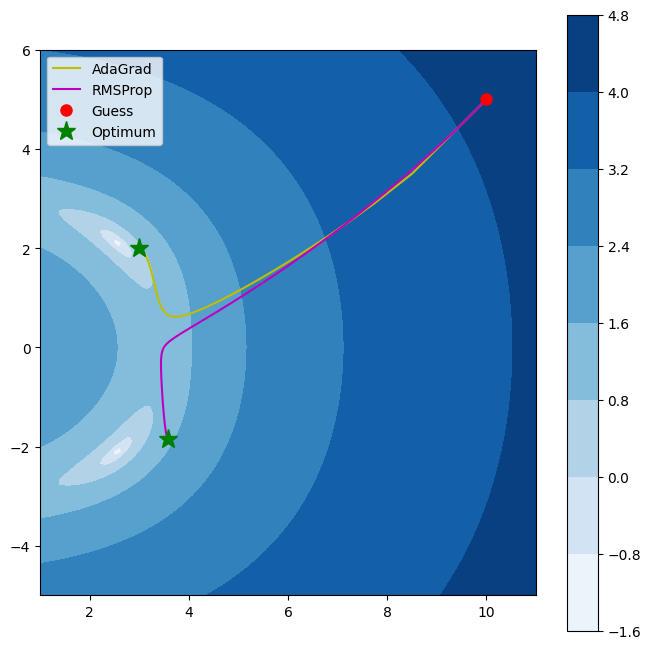

In [8]:
def optimize(x0, func_grad, optimizer):
  """
  Optimizes a function using the specified optimizer
  Arguments:
      x0: an initial point
      func_grad: a gradient of the function
      optimizer: an optimizer
  Returns:
      The local minimum of a function
  """
  # Initialize the current point
  x = x0

  # Run the optimizer until the termination criteria is satisfied
  while optimizer.run():
    # Update the current point
    x = optimizer.update(x, func_grad(x))

  # Return the current point
  return x

# Create the optimizers
adaGrad = AdaGradOptimizer(1.5, 1e-8, 500, 1e-4, True)
rmsProp = RMSPropOptimizer(0.2, 0.91, 1e-8, 500, 1e-4, True)

x0 = np.array([10, 5])
xopt1 = np.array([3.00,  2.00])
xopt2 = np.array([3.58, -1.84])

# Run the optimizers
xopt_adaGrad = optimize(x0, dfdx, adaGrad)
xopt_rmsProp = optimize(x0, dfdx, rmsProp)

# Print the number of iterations
print('Iterations by AdaGrad: ', adaGrad.get_iter())
print('Iterations by RMSProp: ', rmsProp.get_iter())

# Retrieve the optimization history
adaGrad_history = adaGrad.get_history()
rmsProp_history = rmsProp.get_history()

# Create the mesh grid
x = np.linspace(1, 11, 100)
y = np.linspace(-5, 6, 100)
xx, yy = np.meshgrid(x, y)

# Evaluate the function
z = f(np.array([xx, yy]))

# Apply log10
z = np.log10(z)

# Set figure size
plt.figure(figsize=(8, 8))

# Plot the function
cp = plt.contourf(x, y, z, cmap=cm.Blues)
plt.colorbar(cp)

# Plot the optimization history
adaGrad_plot, = plt.plot(adaGrad_history[:,0], adaGrad_history[:,1], 'y-')
rmsProp_plot, = plt.plot(rmsProp_history[:,0], rmsProp_history[:,1], 'm-')

# Plot the optimum and guess points
x0_plot, = plt.plot(x0[0], x0[1], 'ro', markersize=8)
xopt1_plot, = plt.plot(xopt1[0], xopt1[1], 'g*', markersize=14)
xopt2_plot, = plt.plot(xopt2[0], xopt2[1], 'g*', markersize=14)

# Insert legend and set the scaling mode
plt.legend([adaGrad_plot, rmsProp_plot, x0_plot, xopt1_plot, xopt2_plot],
           ['AdaGrad', 'RMSProp', 'Guess', 'Optimum'])
plt.axis('scaled')

# Show the plot
plt.show()

## Task 5

In this task you will modify the method **fit(x, y)** of the class **NLLSestimator** from the **Practice 6** to use AdaGrad and RMSProp instead of the BFGS algorithm.

**Task:** write your code below the **ToDo** comment in the method **fit(x, y)** computing optimal parameters **a** and **b** using the attribute **self.optimizer**.

In [9]:
import numpy as np

def P(x, a):
  """
  Computes P(x, a)
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
  Returns:
      P(x, a)
  """
  return np.sum([a[j - 1] * x ** (j - 1) for j in range(1, a.size + 1)])

def Q(x, b):
  """
  Computes Q(x, b)
  Arguments:
      x: a scalar argument
      b: a vector of coefficients of Q(x, b)
  Returns:
      Q(x, b)
  """
  return 1 + np.sum([b[k - 1] * x ** k for k in range(1, b.size + 1)])

def f_hat(x, a, b):
  """
  Computes f_hat(x, a, b)
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
  Returns:
      f_hat(x, a, b)
  """
  return P(x, a) / Q(x, b)

def J(x, a, b, y):
  """
  Computes J(x, a, b, y)
  Arguments:
      x: a vector of inputs
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a vector of outputs
  Returns:
      J(x, a, b, y)
  """
  return .5 * np.sum([(y_i - f_hat(x_i, a, b)) ** 2 for x_i, y_i in zip(x, y)])

def dJda_l(x, a, b, y, l):
  """
  Computes the partial derivative of J(x, a, b, y) w.r.t. a_l
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
      l: an index of the element of the vector a
  Returns:
      Partial derivative of J(x, a, b, y) w.r.t. a_l
  """
  return np.sum([(y_i - f_hat(x_i, a, b)) * (-x_i ** (l - 1) / Q(x_i, b)) for x_i, y_i in zip(x, y)])

def dJdb_l(x, a, b, y, l):
  """
  Computes the partial derivative of J(x, a, b, y) w.r.t. b_l
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
      l: an index of the element of the vector b
  Returns:
      Partial derivative of J(x, a, b, y) w.r.t. b_l
  """
  return np.sum([(y_i - f_hat(x_i, a, b)) * (x_i ** l * f_hat(x_i, a, b) / Q(x_i, b)) for x_i, y_i in zip(x, y)])

def dJda(x, a, b, y):
  """
  Computes the gradient of J(x, a, b, y) w.r.t. the vector a
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
  Returns:
      Gradient of J(x, a, b, y) w.r.t. the vector a
  """
  return np.array([dJda_l(x, a, b, y, l) for l in range(1, a.size + 1)])

def dJdb(x, a, b, y):
  """
  Computes the gradient of J(x, a, b, y) w.r.t. the vector b
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
  Returns:
      Gradient of J(x, a, b, y) w.r.t. the vector b
  """
  return np.array([dJdb_l(x, a, b, y, l) for l in range(1, b.size + 1)])

  from scipy.optimize import minimize

class NLLSestimator:
  """
  Nonlinear least squares estimator
  """

  def __init__(self, p, q, optimizer):
    """
    Initializes a nonlinear least squares estimator
    Arguments:
        p: a degree of the polynomial P(x, a)
        q: a degree of the polynomial Q(x, b)
        optimizer: an optimizer instance
    """
    self.p = p
    self.q = q
    self.optimizer = optimizer

  def fit(self, x, y):
    """
    Estimates the parameters w of the model using the provided optimizer self.optimizer
    Arguments:
        x: a vector of inputs
        y: a vector of outputs
    """
    # Initialize the parameters
    a = np.zeros(self.p)
    b = np.zeros(self.q)

    # ToDo: Use the optimizer to compute a and b (2 points)

    def func_grad(params):
      a, b = params[:self.p], params[self.p:]
      return np.concatenate((dJda(x, a, b, y), dJdb(x, a, b, y)))

    params = np.concatenate((a, b))
    params_optimized = optimize(params, func_grad, self.optimizer)

    a = params_optimized[:self.p]
    b = params_optimized[self.p:]
    # Store the parameters
    self.a = a
    self.b = b

  def predict(self, x):
    """
    Predicts the outputs based on the input
    Arguments:
        x: a vector of inputs
    Returns:
        The vector of outputs
    """
    # Return the outputs
    return np.array([f_hat(x_i, self.a, self.b) for x_i in x])

Run the cell below to compare AdaGrad and RMSProp on a nonlinear least-squares optimization problem. Both optimizers should be able to fit the nonlinear function such that AdaGrad bounds the initial curve from above and RMSProp bounds it from below. The objective function value for AdaGrad and RMSProp should be $0.172$ and $0.396$, respectively.

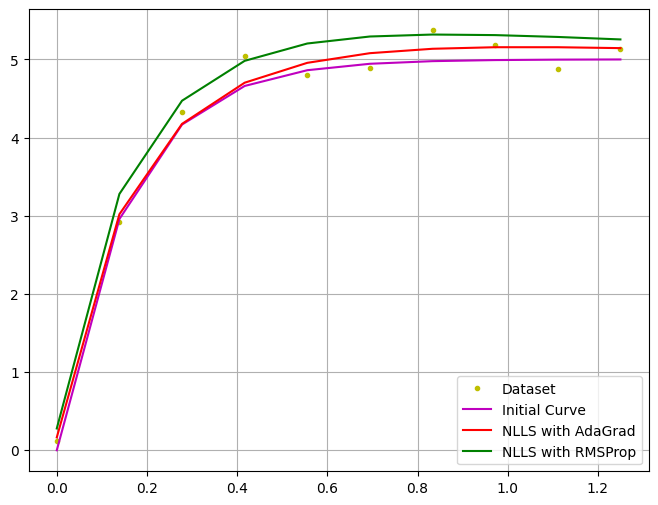

Objective function value for AdaGrad:  0.172
Objective function value for RMSProp:  0.35


In [10]:
import matplotlib.pyplot as plt

def f(x):
  """
  Original function f(x)
  Arguments:
      x: a vector of inputs
  Returns:
      The vector of outputs
  """
  return 5 * (1 - np.exp(-x / (4.7e+3 * 33e-6)))

# Define the number of samples
n = 10

# Define the sampling boundaries
x1 = 0.00
x2 = 1.25

# Define the noise parameters
mean = 0
std = .25

# Ensure reproducibility by making random number generator produce the same
# values at new executions
np.random.seed(42)

# Generate the initial and the noisy samples
x = np.linspace(x1, x2, n)
y_initial = f(x)
y = y_initial + np.random.normal(mean, std, n)

# Create and fit the nonlinear least squares estimator with AdaGrad
nlls_adaGrad = NLLSestimator(3, 2, AdaGradOptimizer(8, max_iter=1500, eps=1e-3))
nlls_adaGrad.fit(x, y)

# Create and fit the nonlinear least squares estimator with RMSProp
nlls_rmsProp = NLLSestimator(3, 2, RMSPropOptimizer(.4, .6, max_iter=1500, eps=1e-3))
nlls_rmsProp.fit(x, y)

# Predict the outputs using both estimators
y_adaGrad = nlls_adaGrad.predict(x)
y_rmsProp = nlls_rmsProp.predict(x)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'y.')
plt.plot(x, y_initial, 'm-')
plt.plot(x, y_adaGrad, 'r-')
plt.plot(x, y_rmsProp, 'g-')
plt.legend(['Dataset', 'Initial Curve', 'NLLS with AdaGrad', 'NLLS with RMSProp'])
plt.grid()
plt.show()

# Print the objective function value
# for both AdaGrad and RMSProp
J_adaGrad = J(x, nlls_adaGrad.a, nlls_adaGrad.b, y)
J_rmsProp = J(x, nlls_rmsProp.a, nlls_rmsProp.b, y)
print('Objective function value for AdaGrad: ', np.around(J_adaGrad, 3))
print('Objective function value for RMSProp: ', np.around(J_rmsProp, 3))

<a name="references"></a>

# References

1. https://towardsdatascience.com/deep-learning-optimizers-436171c9e23f#:~:text=2.%20Adagrad%20(Adaptive%20Gradient%20Algorithm)
2. https://en.wikipedia.org/wiki/Moving_average#:~:text=with%20decreasing%20terms.-,Approximating%20the%20EMA%20with%20a%20limited%20number%20of%20terms,-%5Bedit%5D

